In [1]:
# %%
# Notebook to find the "volume capture metric" with respect to FDR confidence map

from genericpath import isfile
import os
import sys
import shutil
import subprocess
import numpy as np
from datetime import datetime
from joblib import Parallel, delayed




EMDB_PDB_ids_training = ["0026_6gl7", "7573_6crv",  "0665_6oa9", "0038_6gml", "0071_6gve", "0093_6gyn", "0094_6gyo", "0132_6h3c", "0234_6hjn", "0408_6nbd", "0415_6nbq", "4288_6fo2", "0452_6nmi", "0490_6nr8", "0492_6nra", "0567_6o0h", "0589_6nmi", "0592_6o1m", "0776_6ku9", "10049_6rx4", "10069_6s01", "10100_6s5t", "10105_6s6t", "10106_6s6u", "10273_6sof", "10279_6sp2", "10324_6swe", "10333_6swy", "10418_6t9n", "10534_6tni", "10585_6ttu", "10595_6tut", "10617_6xt9", "20145_6oo4", "20146_6oo5", "20189_6osy", "20234_6p19", "20249_6p4h", "20254_6p5a", "20259_6p62", "20270_6p7v", "20271_6p7w", "20352_6pik", "20521_6pxm", "20986_6v0b", "21012_6v1i", "21107_6v8o", "21144_6vbu", "21391_6vv5", "3661_5no2", "3662_5no3", "3802_5of4", "3885_6el1", "3908_6eoj", "4032_5lc5", "4073_5lmn", "4074_5lmo", "4079_5lmt", "4148_5m3m", "4162_6ezo", "4192_6f6w", "4214_6fai", "4241_6fe8", "4272_6fki", "4401_6i2x", "4404_6i3m", "4429_6i84", "4588_6qm5", "4589_6qm6", "4593_6qma", "4728_6r5k", "4746_6r7x", "4759_6r8f", "4888_6ric", "4889_6rid", "4890_6rie", "4907_6rkd", "4917_6rla", "4918_6rlb", "4941_6rn3", "4983_6rqj", "7009_6ave", "7041_6b3q", "7065_6b7y", "7090_6bf6", "7334_6c23", "7335_6c24", "8911_6dt0", "8958_6e1n", "8960_6e1p", "9258_6muw", "9259_6mux", "9931_6k7g", "9934_6k7i", "9935_6k7j", "9939_6k7l", "9941_6k7m", "9695_6iok"]
EMDB_PDB_ids_validation = ["0193_6hcg", "0257_6hra", "0264_6hs7", "0499_6nsk", "10401_6t8h", "20449_6pqo", "20849_6uqk", "4611_6qp6", "4646_6qvb", "4733_6r69", "4789_6rb9", "7133_6bqv", "7882_6dg7", "8069_5i08", "9112_6mgv", "9298_6mzc", "9374_6nhv"]
EMDB_PDB_ids_epsilon = ["0282_6huo", "0311_6hz5", "0560_6nzu", "10365_6t23", "20220_6oxl", "20226_6p07", "3545_5mqf", "4141_5m1s", "4531_6qdw", "4571_6qk7", "4997_6rtc", "7127_6bpq",  "8702_5vkq", "9610_6adq"]
EMDB_PDB_ids_all = EMDB_PDB_ids_training + EMDB_PDB_ids_validation + EMDB_PDB_ids_epsilon

res_dict = {"0026" : 6.3, "0038" : 3.2, "0071" : 3.9, "0093" : 3.4, "0094" : 3.4, "0132" : 3.9, "0234" : 3.3, "0408" : 3.2, "0415" : 3.1, "4288" : 4.4, "0452" : 3.7, "0490" : 7.8, "0492" : 7.7, "0567" : 3.67, "0589" : 3.9, "0592" : 3.15, "0665" : 3.9, "0776" : 2.67, "10049" : 3.3, "10069" : 3.2, "10100" : 4.15, "10105" : 4.1, "10106" : 3.5, "10273" : 4.3, "10279" : 3.33, "10324" : 3.1, "10333" : 3.2, "10418" : 2.96, "10534" : 3.4, "10585" : 3.7, "10595" : 3.25, "10617" : 3.8, "20145" : 3.3, "20146" : 4.2, "20189" : 4.3, "20234" : 3.8, "20249" : 3.2, "20254" : 3.6, "20259" : 3.57, "20270" : 4, "20271" : 4.1, "20352" : 7.8, "20521" : 2.1, "20986" : 4.1, "21012" : 3.8, "21107" : 3.07, "21144" : 3.1, "21391" : 3.5, "3661" : 5.16, "3662" : 5.16, "3802" : 4.4, "3885" : 6.1, "3908" : 3.55, "4032" : 4.35, "4073" : 3.55, "4074" : 4.3, "4079" : 4.15, "4148" : 4, "4162" : 4.1, "4192" : 3.81, "4214" : 3.4, "4241" : 4.1, "4272" : 4.3, "4401" : 3.35, "4404" : 3.93, "4429" : 4.4, "4588" : 3.6, "4589" : 3.7, "4593" : 3.7, "4728" : 4.8, "4746" : 3.47, "4759" : 3.8, "4888" : 2.8, "4889" : 2.9, "4890" : 3.1, "4907" : 3.2, "4917" : 3.9, "4918" : 4.5, "4941" : 4, "4983" : 3.5, "7009" : 3.7, "7041" : 3.7, "7065" : 6.5, "7090" : 6.5, "7334" : 3.9, "7335" : 3.5, "8911" : 3.7, "8958" : 3.7, "8960" : 3.7, "9258" : 3.6, "9259" : 3.9, "9931" : 3.3, "9934" : 3.22, "9935" : 3.08, "9939" : 2.83, "9941" : 2.95, "9695" : 3.64, "0193" : 4.3, "0257" : 3.7, "0264" : 4.6, "0499" : 2.7, "10401" : 3.77, "20449" : 2.88, "20849" : 3.77, "4611" : 3.2, "4646" : 4.34, "4733" : 3.65, "4789" : 3.2, "7133" : 3.1, "7882" : 3.32, "8069" : 4.04, "9112" : 3.1, "9298" : 4.5, "9374" : 3.5, "0282" : 3.26, "0311" : 4.2, "0560" : 3.2, "10365" : 3.1, "20220" : 3.5, "20226" : 3.2, "3545" : 5.9, "4141" : 6.7, "4531" : 2.83, "4571" : 3.3, "4997" : 3.96, "7127" : 4.1, "7573" : 3.2, "8702" : 3.55, "9610" : 3.5}

symmetry_dictionary = {'0026': 'C2', '0038': 'C1', '0071': 'D2', '0093': 'C4', '0094': 'C4', '0132': 'C2', '0234': 'C3', '0408': 'C2', '0415': 'C1', '4288': 'C2', '0452': 'C1', '0490': 'C1', '0492': 'C1', '0567': 'D2', '0589': 'C1', '0592': 'C2', '0665': 'C1', '0776': 'C3', '10049': 'C1', '10069': 'C1', '10100': 'C1', '10105': 'C1', '10106': 'C2', '10273': 'C1', '10279': 'C6', '10324': 'C1', '10333': 'C1', '10418': 'C4', '10534': 'C1', '10585': 'C1', '10595': 'C1', '10617': 'C1', '20145': 'C2', '20146': 'C2', '20189': 'C3', '20234': 'C1', '20249': 'C1', '20254': 'C2', '20259': 'C3', '20270': 'C1', '20271': 'C1', '20352': 'C2', '20521': 'O', '20986': 'C5', '21012': 'C9', '21107': 'C1', '21144': 'C1', '21391': 'C3', '3661': 'C1', '3662': 'C1', '3802': 'C1', '3885': 'C10', '3908': 'C1', '4032': 'C1', '4073': 'C1', '4074': 'C1', '4079': 'C1', '4148': 'C1', '4162': 'C2', '4192': 'C1', '4214': 'C1', '4241': 'C1', '4272': 'C1', '4401': 'C1', '4404': 'C2', '4429': 'C1', '4588': 'C2', '4589': 'C2', '4593': 'C2', '4728': 'C1', '4746': 'C2', '4759': 'C1', '4888': 'C1', '4889': 'C1', '4890': 'C1', '4907': 'D3', '4917': 'C2', '4918': 'C1', '4941': 'C1', '4983': 'C1', '7009': 'C3', '7041': 'C1', '7065': 'C1', '7090': 'C2', '7334': 'C1', '7335': 'C1', '8911': 'C2', '8958': 'C2', '8960': 'C2', '9258': 'C2', '9259': 'C1', '9931': 'C1', '9934': 'C1', '9935': 'C1', '9939': 'C1', '9941': 'C1', '9695': 'C1', '0193': 'C15', '0257': 'C1', '0264': 'C5', '0499': 'C6', '10401': 'C1', '20449': 'C4', '20849': 'C4', '4611': 'C2', '4646': 'C2', '4733': 'C1', '4789': 'C7', '7133': 'C4', '7882': 'C5', '8069': 'C3', '9112': 'C2', '9298': 'C1', '9374': 'C1', '0282': 'C1', '0311': 'C2', '0560': 'C2', '10365': 'C1', '20220': 'C1', '20226': 'C1', '3545': 'C1', '4141': 'C1', '4531': 'C1', '4571': 'C1', '4997': 'C2', '7127': 'C4', '7573': 'C3', '8702': 'C4', '9610': 'C2'}


# %%

def get_input_files(emdb_pdb, dataset_type):
    
    if dataset_type == "MB":
        suffix = "_epsilon_MB"
    elif dataset_type == "MF":
        suffix = "_epsilon_MF"
    elif dataset_type == "hybrid":
        suffix = "_epsilon_MBI"
    else:
        suffix = ""
        data_folder_alpha = "/home/abharadwaj1/shortcuts/locscale_mapdata/collection_dataset_3"
    data_folder_epsilon = "/home/abharadwaj1/shortcuts/locscale_mapdata/dataset_attempt{}".format(suffix)
    emdb_pdb_path = os.path.join(data_folder_epsilon, emdb_pdb)
    emdb, pdb = emdb_pdb.split("_")
    try:
        symmetry = symmetry_dictionary[emdb]
    except KeyError:
        print("No symmetry information for {}".format(emdb))
        print(emdb_pdb)
        raise KeyError

    folder_containing_files = os.path.join(emdb_pdb_path)
    folder_containing_phenix_and_deposited_maps = f"/home/abharadwaj1/papers/elife_paper/figure_information/outputs/figure_3/qscores/{emdb_pdb}/"
    phenix_sharpened_map_path_1 = os.path.join(folder_containing_phenix_and_deposited_maps, "emd_{}_phenix_sharpened.map".format(emdb))
    phenix_sharpened_map_path_2 = os.path.join(folder_containing_phenix_and_deposited_maps, "emd_{}_Phenix.map".format(emdb))
    
    atomic_model_mask = f"/home/abharadwaj1/dev/map_sharpening/locscale_analysis/locscale_analysis_files/locscale_mapdata/collection_dataset_3/{emdb_pdb}/emd_{emdb}_MB_locscale_processing_files/PDB_{pdb}_unrefined_shifted_servalcat_refined_model_mask.mrc"

    if os.path.exists(phenix_sharpened_map_path_1):
        phenix_sharpened_map_path = phenix_sharpened_map_path_1
    elif os.path.exists(phenix_sharpened_map_path_2):
        phenix_sharpened_map_path = phenix_sharpened_map_path_2
    else:
        phenix_sharpened_map_path = "none"

    #deposited_map = f"/tudelft/abharadwaj1/staff-umbrella/ajlab/students/MEP/2021/RB/mapdata/{emdb_pdb}/EMDBmaps/sharpened_maps/emd_{emdb}_deposited.map"
    deposited_map = os.path.join(folder_containing_phenix_and_deposited_maps, "emd_{}_deposited.map".format(emdb))

    model_based_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_based_locscale{}.mrc".format(emdb, suffix))
    model_free_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_free_locscale{}.mrc".format(emdb, suffix))
    model_based_integrated_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_based_integrated_locscale{}.mrc".format(emdb, suffix))

    MB_processing_file = os.path.join(folder_containing_files, "emd_{}_MB_locscale_processing_files{}".format(emdb, suffix))
    refined_pdb_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined.pdb".format(pdb))
    refined_shifted_pdb_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_bfactors.pdb".format(pdb))
    refined_model_map_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_bfactors_4locscale.mrc".format(pdb))


    MF_processing_file = os.path.join(folder_containing_files, "emd_{}_MF_locscale_processing_files{}".format(emdb, suffix))
    refined_pseudomodel_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition.pdb".format(emdb))
    refined_shifted_pseudomodel_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors.pdb".format(emdb))
    
    if symmetry == "C1":
        refined_pseudo_model_map_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale.mrc".format(emdb))
    else:
        refined_pseudo_model_map_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale_{}_symmetry.mrc".format(emdb, symmetry))
    
    MB_integrated_processing_file = os.path.join(folder_containing_files, "emd_{}_MB_integrated_locscale_processing_files{}".format(emdb, suffix))
    refined_integrated_pdb_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition.pdb".format(pdb))
    refined_integrated_shifted_pdb_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors.pdb".format(pdb))
    if symmetry == "C1":
        refined_integrated_model_map_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors_4locscale.mrc".format(pdb))
    else:
        refined_integrated_model_map_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors_4locscale_{}_symmetry.mrc".format(pdb, symmetry))
    
    if dataset_type == "MB":
        target_processing_file = MB_processing_file
        target_pdb_path = refined_pdb_path
        target_shifted_pdb_path = refined_shifted_pdb_path
        target_model_map_path = refined_model_map_path
        target_sharpened_file = model_based_locscale_file
    elif dataset_type == "MF":
        target_processing_file = MF_processing_file
        target_pdb_path = refined_pseudomodel_path
        target_shifted_pdb_path = refined_shifted_pseudomodel_path
        target_model_map_path = refined_pseudo_model_map_path
        target_sharpened_file = model_free_locscale_file
    elif dataset_type == "hybrid":
        target_processing_file = MB_integrated_processing_file
        target_pdb_path = refined_integrated_pdb_path
        target_shifted_pdb_path = refined_integrated_shifted_pdb_path
        target_model_map_path = refined_integrated_model_map_path
        target_sharpened_file = model_based_integrated_locscale_file
        


    unsharpened_map_file = os.path.join(target_processing_file, "EMD_{}_unsharpened_fullmap.mrc".format(int(emdb)))
    halfmap_1_file = os.path.join(target_processing_file, "emd_{}_half_map_1.map".format(emdb))
    halfmap_2_file = os.path.join(target_processing_file, "emd_{}_half_map_2.map".format(emdb))
    globally_sharpened_map_file = os.path.join(target_processing_file, "EMD_{}_unsharpened_fullmap_global_sharpened_filtered.mrc".format(int(emdb)))
    mask_file = os.path.join(target_processing_file, "emd_{}_FDR_confidence_final.map".format(emdb))
        
    input_files_emdb = {
        "model_based_locscale_file": model_based_locscale_file,
        "model_free_locscale_file": model_free_locscale_file,
        "model_based_integrated_locscale_file": model_based_integrated_locscale_file,
        "refined_pdb_path": refined_pdb_path,
        "refined_shifted_pdb_path": refined_shifted_pdb_path,
        "refined_pseudomodel_path": refined_pseudomodel_path,
        "refined_integrated_pdb_path": refined_integrated_pdb_path,
        "unsharpened_map_file": unsharpened_map_file,
        "globally_sharpened_map_file": globally_sharpened_map_file,
        "mask_file": mask_file,
        "halfmap_1_file": halfmap_1_file,
        "halfmap_2_file": halfmap_2_file,
        "refined_model_map_path": refined_model_map_path,
        "refined_pseudo_model_map_path": refined_pseudo_model_map_path,
        "refined_integrated_model_map_path": refined_integrated_model_map_path,
        "target_processing_file": target_processing_file,
        "target_pdb_path": target_pdb_path,
        "target_shifted_pdb_path": target_shifted_pdb_path,
        "target_model_map_path": target_model_map_path,
        "target_sharpened_file": target_sharpened_file,
        "phenix_sharpened_map_path": phenix_sharpened_map_path,
        "deposited_map_path": deposited_map,
        "atomic_model_mask" : atomic_model_mask,
    }

    # Check if all input files exist and if not then change the value of the dictionary to None
    for key, value in input_files_emdb.items():
        if not os.path.exists(value):
            input_files_emdb[key] = None
    return input_files_emdb

# %%
# %%
# Load the input files for the EMDBs
input_files_emdb_epsilon_MB = {}
input_files_emdb_epsilon_MF = {}
input_files_emdb_epsilon_hybrid = {}
emdb_pdbs_present = []
for emdb_pdb in EMDB_PDB_ids_all:
    input_files_emdb_epsilon_MB[emdb_pdb] = get_input_files(emdb_pdb, "MB")
    input_files_emdb_epsilon_MF[emdb_pdb] = get_input_files(emdb_pdb, "MF")
    input_files_emdb_epsilon_hybrid[emdb_pdb] = get_input_files(emdb_pdb, "hybrid")

    required_files = ["unsharpened_map_file", "target_sharpened_file", "target_model_map_path", "phenix_sharpened_map_path", "deposited_map_path", "mask_file"]
    print("Checking if all required files exist for {}".format(emdb_pdb))
    print("===============================================")
    # Check if all required files exist and print a warning if not
    missing_files = []
    for required_file in required_files:
        
        if input_files_emdb_epsilon_MB[emdb_pdb][required_file] is None :
            print("\t{} missing".format(required_file))
            missing_files.append((required_file, "MB"))
        if input_files_emdb_epsilon_MF[emdb_pdb][required_file] is None :
            print("\t{} missing".format(required_file))
            missing_files.append((required_file, "MF"))
        if input_files_emdb_epsilon_hybrid[emdb_pdb][required_file] is None :
            print("\t{} missing".format(required_file))
            missing_files.append((required_file, "hybrid"))
    if len(missing_files) == 0:
        emdb_pdbs_present.append(emdb_pdb)

# Number of EMDBs with all required files
print("Number of EMDBs with all required files: {}".format(len(emdb_pdbs_present)))
print("===============================================")
print("Number of EMDBs with missing files: {}".format(len(EMDB_PDB_ids_all) - len(emdb_pdbs_present)))

        
print("===============================================")



# %%
def volume_threshold_curve(target_map, apix, num_bins=100):
    from locscale.include.emmer.ndimage.map_tools import compute_real_space_correlation as rsc
    from locscale.include.emmer.ndimage.map_utils import binarizeMap, load_map, parse_input
    import math
    target_map = parse_input(target_map)


    threshold_range_target = np.linspace(0.0005, target_map.max(), num_bins)
    
    volume = {}
    for threshold in threshold_range_target:
        binarised_target = binarizeMap(target_map, threshold)
        volume[threshold] = binarised_target.sum() * apix**3
    
    return volume

def get_volume_threshold_plot(*volume_threshold_curves, labels, emdb_id):
    import matplotlib.pyplot as plt

    assert len(volume_threshold_curves) == len(labels), "Number of volume threshold curves and labels should be the same"
    
    volume_threshold_curve_dictionary = {}
    print("Creating volume threshold curve dictionary")
    for volume_threshold_curve, label in zip(volume_threshold_curves, labels):
        volume_threshold_curve_dictionary[label] = volume_threshold_curve

    volume_at_first_threshold = [volume_threshold_curve_dictionary[label][0.0005] for label in labels]
    minimum_volume_at_first_threshold = min(volume_at_first_threshold)
    print("Minimum volume at first threshold: {}".format(minimum_volume_at_first_threshold))
    print("Plotting volume threshold curves for {}".format(emdb_id))
    plt.figure(figsize=(10,10))
    for label, volume_threshold_curve in volume_threshold_curve_dictionary.items():
        print("Plotting volume threshold curve for {}".format(label))
        volumes = np.array(list(volume_threshold_curve.values()))
        volumes_log = np.log(volumes)
        threshold_percentage = np.arange(1, 100, len(volumes_log))
        plt.plot(threshold_percentage, volumes_log, label=label)
        
    plt.legend()
    plt.xlabel("Threshold as percentage of maximum")
    plt.ylabel("Volume (log)")
    plt.title("Volume threshold curve for {}".format(emdb_id))
    
    return plt


# %%
# For each EMDB compute the similarity threshold for the unsharpened, deposited, model based, model free, hybrid, phenix sharpened maps
from locscale.include.emmer.ndimage.map_utils import load_map
from locscale.include.emmer.ndimage.map_tools import compute_real_space_correlation as rsc
from locscale.include.emmer.ndimage.map_tools import get_atomic_model_mask
from locscale.include.emmer.ndimage.map_utils import binarizeMap, load_map, parse_input
from locscale.include.emmer.pdb.pdb_utils import get_coordinates
from locscale.include.emmer.ndimage.map_utils import convert_pdb_to_mrc_position, dilate_mask
from sklearn.metrics import precision_score, recall_score
from locscale.include.emmer.ndimage.filter import get_cosine_mask
from scipy.ndimage import uniform_filter
import gemmi
import pickle
volume_thresholds = {}
volumes_emdb_unsharpened = {}
volumes_emdb_deposited = {}
volumes_emdb_model_based = {}
volumes_emdb_model_free = {}
volumes_emdb_hybrid = {}
volumes_emdb_phenix_sharpened = {}

for emdb_pdb in emdb_pdbs_present:
    fdr_mask_file = input_files_emdb_epsilon_MB[emdb_pdb]["mask_file"]
    atomic_model_path = input_files_emdb_epsilon_MB[emdb_pdb]["refined_pdb_path"]
    unsharpened_map_file = input_files_emdb_epsilon_MB[emdb_pdb]["unsharpened_map_file"]
    deposited_map_file = input_files_emdb_epsilon_MB[emdb_pdb]["deposited_map_path"]
    model_based_map_file = input_files_emdb_epsilon_MB[emdb_pdb]["target_sharpened_file"]
    model_free_map_file = input_files_emdb_epsilon_MF[emdb_pdb]["target_sharpened_file"]
    hybrid_map_file = input_files_emdb_epsilon_hybrid[emdb_pdb]["target_sharpened_file"]
    phenix_sharpened_map_file = input_files_emdb_epsilon_hybrid[emdb_pdb]["phenix_sharpened_map_path"]

    required_files_list = [fdr_mask_file, atomic_model_path, unsharpened_map_file, deposited_map_file, model_based_map_file, model_free_map_file, hybrid_map_file, phenix_sharpened_map_file]
    for required_file in required_files_list:
        if required_file is None:
            print("Required file {} is missing for {}".format(required_file, emdb_pdb))
            continue

    unsharpened_map_data, apix = load_map(unsharpened_map_file)
    deposited_map_data, apix = load_map(deposited_map_file)
    model_based_map_data, apix = load_map(model_based_map_file)
    model_free_map_data, apix = load_map(model_free_map_file)
    hybrid_map_data, apix = load_map(hybrid_map_file)
    phenix_sharpened_map_data, apix = load_map(phenix_sharpened_map_file)
    
    try:
        # Compute the similarity threshold for the unsharpened map
        nbins = 10
        unsharpened_volume_curve = volume_threshold_curve(unsharpened_map_data,apix, num_bins=nbins)
        deposited_volume_curve = volume_threshold_curve(deposited_map_data, apix,num_bins=nbins)
        model_based_volume_curve = volume_threshold_curve(model_based_map_data,apix, num_bins=nbins)
        model_free_volume_curve = volume_threshold_curve(model_free_map_data,apix, num_bins=nbins)
        hybrid_volume_curve = volume_threshold_curve(hybrid_map_data,apix, num_bins=nbins)
        phenix_sharpened_volume_curve = volume_threshold_curve(phenix_sharpened_map_data,apix, num_bins=nbins)        
        

        volumes_emdb_unsharpened[emdb_pdb] = np.array(list(unsharpened_volume_curve.values()))
        volumes_emdb_deposited[emdb_pdb] = np.array(list(deposited_volume_curve.values()))
        volumes_emdb_model_based[emdb_pdb] = np.array(list(model_based_volume_curve.values()))
        volumes_emdb_model_free[emdb_pdb] = np.array(list(model_free_volume_curve.values()))
        volumes_emdb_hybrid[emdb_pdb] = np.array(list(hybrid_volume_curve.values()))
        volumes_emdb_phenix_sharpened[emdb_pdb] = np.array(list(phenix_sharpened_volume_curve.values()))


        
        # dump the rscc scores and the corresponding thresholds to a pickle file
        outputpickle_file = "/home/abharadwaj1/papers/elife_paper/figure_information/scripts/volume_threshold_curves/volume_threshold_curve_{}.pickle".format(emdb_pdb)
        outputplot_file = "/home/abharadwaj1/papers/elife_paper/figure_information/scripts/volume_threshold_curves/volume_threshold_curve_{}.png".format(emdb_pdb)
        file_dictionary = {}
        file_dictionary["unsharpened_volume_curve"] = unsharpened_volume_curve
        file_dictionary["deposited_volume_curve"] = deposited_volume_curve
        file_dictionary["model_based_volume_curve"] = model_based_volume_curve
        file_dictionary["model_free_volume_curve"] = model_free_volume_curve
        file_dictionary["hybrid_volume_curve"] = hybrid_volume_curve
        file_dictionary["phenix_sharpened_volume_curve"] = phenix_sharpened_volume_curve

        with open(outputpickle_file, "wb") as f:
            pickle.dump(file_dictionary, f)


       
        # plot the precision recall curves
        labels = ["Unsharpened", "Deposited", "Model-based", "Model-free", "Hybrid", "Phenix-sharpened"]
        fig = get_volume_threshold_plot(unsharpened_volume_curve, deposited_volume_curve, model_based_volume_curve, model_free_volume_curve, hybrid_volume_curve, phenix_sharpened_volume_curve, labels=labels, emdb_id=emdb_pdb)
        fig.savefig(outputplot_file)
        fig.clf()



    except Exception as e:
        print(e)
        print("Error in {}".format(emdb_pdb))
        continue


Checking if all required files exist for 0026_6gl7
Checking if all required files exist for 7573_6crv
Checking if all required files exist for 0665_6oa9
Checking if all required files exist for 0038_6gml
Checking if all required files exist for 0071_6gve
Checking if all required files exist for 0093_6gyn
Checking if all required files exist for 0094_6gyo
Checking if all required files exist for 0132_6h3c
Checking if all required files exist for 0234_6hjn
Checking if all required files exist for 0408_6nbd
Checking if all required files exist for 0415_6nbq
Checking if all required files exist for 4288_6fo2
Checking if all required files exist for 0452_6nmi
Checking if all required files exist for 0490_6nr8
Checking if all required files exist for 0492_6nra
Checking if all required files exist for 0567_6o0h
	target_sharpened_file missing
	target_model_map_path missing
	phenix_sharpened_map_path missing
	phenix_sharpened_map_path missing
	phenix_sharpened_map_path missing
	deposited_map_pa

/tmp/ipykernel_29664/3241233655.py:224: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,10))


Creating volume threshold curve dictionary
Minimum volume at first threshold: 1914055.187515845
Plotting volume threshold curves for 10106_6s6u
Plotting volume threshold curve for Unsharpened
Plotting volume threshold curve for Deposited
Plotting volume threshold curve for Model-based
Plotting volume threshold curve for Model-free
Plotting volume threshold curve for Hybrid
Plotting volume threshold curve for Phenix-sharpened
Creating volume threshold curve dictionary
Minimum volume at first threshold: 544700.3602446567
Plotting volume threshold curves for 10273_6sof
Plotting volume threshold curve for Unsharpened
Plotting volume threshold curve for Deposited
Plotting volume threshold curve for Model-based
Plotting volume threshold curve for Model-free
Plotting volume threshold curve for Hybrid
Plotting volume threshold curve for Phenix-sharpened
Creating volume threshold curve dictionary
Minimum volume at first threshold: 926024.7322555009
Plotting volume threshold curves for 10279_6sp

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm


# Data manipulation:

def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments


def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 100, len(x))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(z)
    
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    
    ax = plt.gca()
    ax.add_collection(lc)
    
    return lc

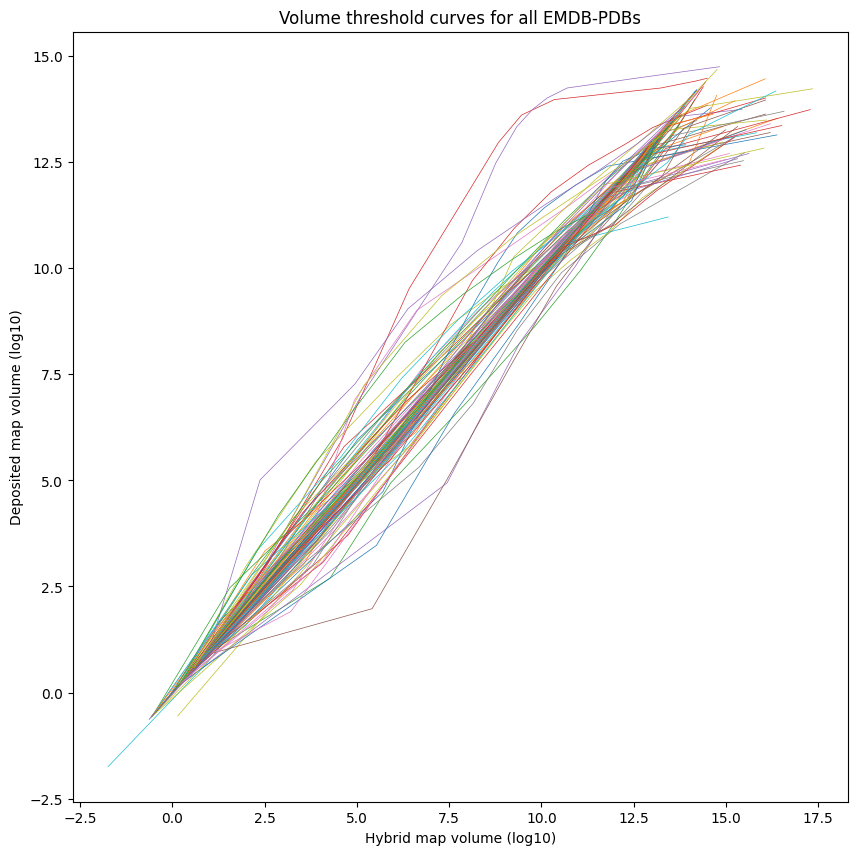

In [3]:
# plot the volume threshold curves for all the EMDB-PDBs
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
for emdbpdb in volumes_emdb_deposited.keys():
    vols_hybrid_log = np.log(list(volumes_emdb_hybrid[emdbpdb]))
    vols_deposited_log = np.log(list(volumes_emdb_model_based[emdbpdb]))
     # color linearly from red to blue and draw a line
    #colorline(vols_hybrid_log, vols_deposited_log, cmap=plt.get_cmap('viridis'), linewidth=0.5, alpha=1)
    sns.lineplot(x=vols_hybrid_log, y=vols_deposited_log, ax=ax, linewidth=0.5, alpha=1)
    
ax.set_xlabel("Hybrid map volume (log10)")
ax.set_ylabel("Deposited map volume (log10)")
ax.set_title("Volume threshold curves for all EMDB-PDBs")
fig.savefig("/home/abharadwaj1/papers/elife_paper/figure_information/scripts/volume_threshold_curves/volume_threshold_curve_all.png")



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


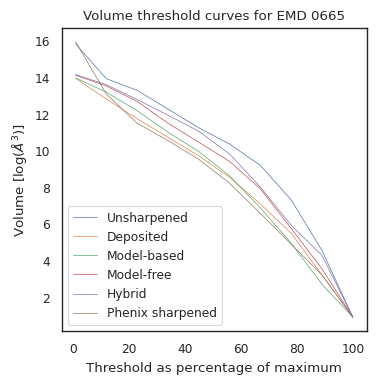

In [46]:
# plot the volume threshold curves for EMD 0665
import seaborn as sns
fig, ax = plt.subplots(figsize=(10/2.54, 10/2.54))
font="Helvetica"
fontscale=1
plt.rcParams.update({'font.size': 2})
sns.set_theme(context="paper", font=font, font_scale=fontscale)
# Set font size for all text in the figure
sns.set_style("white")

vol_threshold_emd_0665_unsharpened = volumes_emdb_unsharpened["0665_6oa9"]
vol_threshold_emd_0665_deposited = volumes_emdb_deposited["0665_6oa9"]
vol_threshold_emd_0665_model_based = volumes_emdb_model_based["0665_6oa9"]
vol_threshold_emd_0665_model_free = volumes_emdb_model_free["0665_6oa9"]
vol_threshold_emd_0665_hybrid = volumes_emdb_hybrid["0665_6oa9"]
vol_threshold_emd_0665_phenix_sharpened = volumes_emdb_phenix_sharpened["0665_6oa9"]

vols_threshold_log = np.log(vol_threshold_emd_0665_unsharpened)
vols_deposited_log = np.log(vol_threshold_emd_0665_deposited)
vols_model_based_log = np.log(vol_threshold_emd_0665_model_based)
vols_model_free_log = np.log(vol_threshold_emd_0665_model_free)
vols_hybrid_log = np.log(vol_threshold_emd_0665_hybrid)
vols_phenix_sharpened_log = np.log(vol_threshold_emd_0665_phenix_sharpened)

xarray = np.linspace(1,100,len(vols_threshold_log))
sns.lineplot(x=xarray, y=vols_threshold_log, ax=ax, linewidth=0.5, alpha=1, label="Unsharpened")
sns.lineplot(x=xarray, y=vols_deposited_log, ax=ax, linewidth=0.5, alpha=1, label="Deposited")
sns.lineplot(x=xarray, y=vols_model_based_log, ax=ax, linewidth=0.5, alpha=1, label="Model-based")
sns.lineplot(x=xarray, y=vols_model_free_log, ax=ax, linewidth=0.5, alpha=1, label="Model-free")
sns.lineplot(x=xarray, y=vols_hybrid_log, ax=ax, linewidth=0.5, alpha=1, label="Hybrid")
sns.lineplot(x=xarray, y=vols_phenix_sharpened_log, ax=ax, linewidth=0.5, alpha=1, label="Phenix sharpened")

ax.set_ylabel("Volume [log($\AA^3$)]")
ax.set_xlabel("Threshold as percentage of maximum")
ax.set_title("Volume threshold curves for EMD 0665")
fig.savefig("./a_volume_threshold_curve_emd_0665.eps", dpi=600)



In [4]:
# Plot the volumes at 20% threshold, 50% threshold and 80% threshold
# for all maps as a boxplot
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get the volumes at 20%, 50% and 80% threshold
volumes_at_given_thresholds = {}
nbins = len(list(volumes_emdb_deposited.values())[0])
for emdbpdb in volumes_emdb_deposited.keys():
    volume_unsharp_20 = volumes_emdb_unsharpened[emdbpdb][int(0.2*nbins)]
    volume_unsharp_50 = volumes_emdb_unsharpened[emdbpdb][int(0.5*nbins)]
    volume_unsharp_80 = volumes_emdb_unsharpened[emdbpdb][int(0.8*nbins)]
    volume_deposited_20 = volumes_emdb_deposited[emdbpdb][int(0.2*nbins)]
    volume_deposited_50 = volumes_emdb_deposited[emdbpdb][int(0.5*nbins)]
    volume_deposited_80 = volumes_emdb_deposited[emdbpdb][int(0.8*nbins)]
    volume_model_based_20 = volumes_emdb_model_based[emdbpdb][int(0.2*nbins)]
    volume_model_based_50 = volumes_emdb_model_based[emdbpdb][int(0.5*nbins)]
    volume_model_based_80 = volumes_emdb_model_based[emdbpdb][int(0.8*nbins)]
    volume_model_free_20 = volumes_emdb_model_free[emdbpdb][int(0.2*nbins)]
    volume_model_free_50 = volumes_emdb_model_free[emdbpdb][int(0.5*nbins)]
    volume_model_free_80 = volumes_emdb_model_free[emdbpdb][int(0.8*nbins)]
    volume_hybrid_20 = volumes_emdb_hybrid[emdbpdb][int(0.2*nbins)]
    volume_hybrid_50 = volumes_emdb_hybrid[emdbpdb][int(0.5*nbins)]
    volume_hybrid_80 = volumes_emdb_hybrid[emdbpdb][int(0.8*nbins)]
    volume_phenix_sharpened_20 = volumes_emdb_phenix_sharpened[emdbpdb][int(0.2*nbins)]
    volume_phenix_sharpened_50 = volumes_emdb_phenix_sharpened[emdbpdb][int(0.5*nbins)]
    volume_phenix_sharpened_80 = volumes_emdb_phenix_sharpened[emdbpdb][int(0.8*nbins)]
    
    volumes_at_given_thresholds[emdbpdb] = {
        "20": {
            "unsharp": volume_unsharp_20,
            "deposited": volume_deposited_20,
            "model_based": volume_model_based_20,
            "model_free": volume_model_free_20,
            "hybrid": volume_hybrid_20,
            "phenix_sharpened": volume_phenix_sharpened_20
        },
        "50": {
            "unsharp": volume_unsharp_50,
            "deposited": volume_deposited_50,
            "model_based": volume_model_based_50,
            "model_free": volume_model_free_50,
            "hybrid": volume_hybrid_50,
            "phenix_sharpened": volume_phenix_sharpened_50
        },
        "80": {
            "unsharp": volume_unsharp_80,
            "deposited": volume_deposited_80,
            "model_based": volume_model_based_80,
            "model_free": volume_model_free_80,
            "hybrid": volume_hybrid_80,
            "phenix_sharpened": volume_phenix_sharpened_80
    }
    }
    





In [5]:
# plot the volumes at 20%, 50% and 80% threshold as a boxplot
import seaborn as sns
import pandas as pd
import numpy as np

# get the volumes at 20%, 50% and 80% threshold
# convert the volumes to a pandas dataframe
# with columns "threshold percentage", "map type", "volume" for all EMDB entries
volumes_at_given_thresholds_df = pd.DataFrame(columns=["threshold percentage", "map type", "volume"])
for emdbpdb in volumes_at_given_thresholds.keys():
    for threshold in volumes_at_given_thresholds[emdbpdb].keys():
        for map_type in volumes_at_given_thresholds[emdbpdb][threshold].keys():
            volumes_at_given_thresholds_df = volumes_at_given_thresholds_df.append({
                "threshold percentage": threshold,
                "map type": map_type,
                "volume": volumes_at_given_thresholds[emdbpdb][threshold][map_type]
            }, ignore_index=True)



/tmp/ipykernel_29664/2866383368.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  volumes_at_given_thresholds_df = volumes_at_given_thresholds_df.append({
/tmp/ipykernel_29664/2866383368.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  volumes_at_given_thresholds_df = volumes_at_given_thresholds_df.append({
/tmp/ipykernel_29664/2866383368.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  volumes_at_given_thresholds_df = volumes_at_given_thresholds_df.append({
/tmp/ipykernel_29664/2866383368.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  volumes_at_given_thresholds_df = volumes_at_given_thresholds_df.append({
/tmp/ipykern

In [6]:
volumes_at_given_thresholds_df 


threshold percentage          map type         volume
0                      20           unsharp  402802.509623
1                      20         deposited  236704.182002
2                      20       model_based  318026.169547
3                      20        model_free  307007.896298
4                      20            hybrid  462729.274833
...                   ...               ...            ...
1795                   80         deposited       4.394000
1796                   80       model_based      28.560997
1797                   80        model_free      83.485991
1798                   80            hybrid      35.151996
1799                   80  phenix_sharpened      21.969998

[1800 rows x 3 columns]

In [26]:
def pretty_boxplots1(list_of_series_raw, xticks, ylabel,xlabel=None, figsize_cm=(14,8),\
                    fontscale=3,font="Helvetica",linewidth=2, title=None, fontsize=10):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import cm
    import matplotlib
    
    ## Headers
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    # set the global font size for the plot

    list_of_series = []
    for ar in list_of_series_raw:
        ar = list(ar)
        list_of_series.append(ar)

        
    plt.rcParams.update({'font.size': fontsize})
    figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches
    
    fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
    sns.set_theme(context="paper", font=font, font_scale=fontscale)
    # Set font size for all text in the figure
    sns.set_style("white")

    ## Plot the data


    ax1.boxplot(list_of_series)
    ax1.set_xticklabels(xticks)
    # set xtick labels rotation
    plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    ax1.set_ylabel(ylabel)
    # set yscale to log
    ax1.set_yscale('log')
    if title is not None:
        ax1.set_title(title)
    if xlabel is not None:
        ax1.set_xlabel(xlabel)
    fig.tight_layout()
    
    return fig

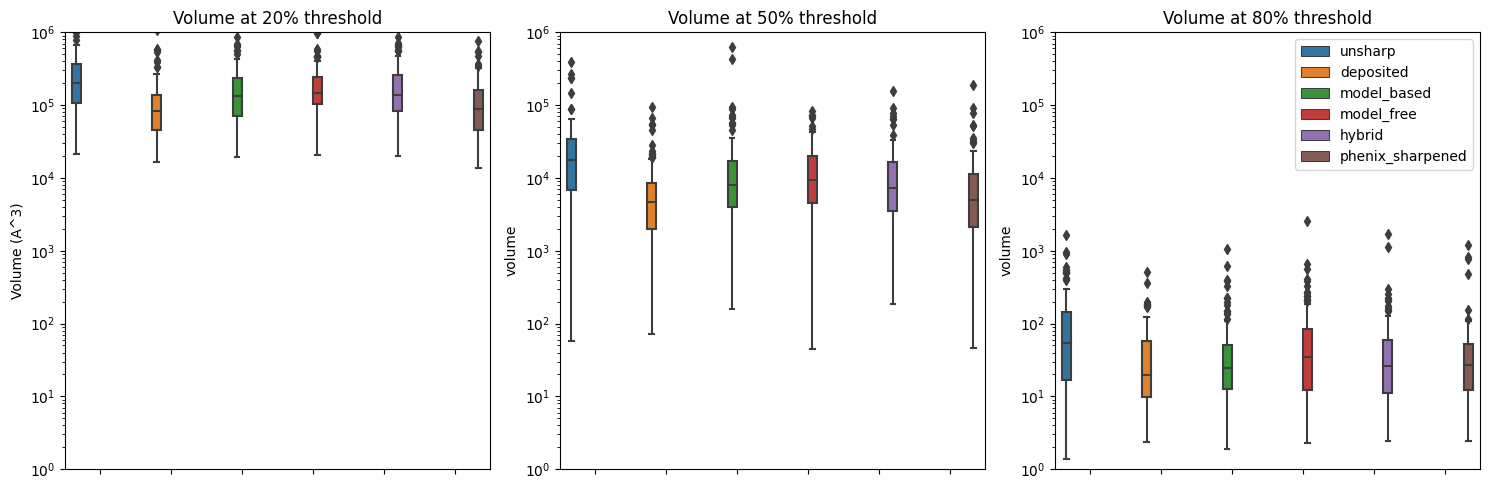

In [8]:
# plot the volumes at 20%, 50% and 80% threshold as a boxplot in three subplots
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
volumes_at_given_thresholds_df_20 = volumes_at_given_thresholds_df[volumes_at_given_thresholds_df["threshold percentage"] == "20"]
volumes_at_given_thresholds_df_50 = volumes_at_given_thresholds_df[volumes_at_given_thresholds_df["threshold percentage"] == "50"]
volumes_at_given_thresholds_df_80 = volumes_at_given_thresholds_df[volumes_at_given_thresholds_df["threshold percentage"] == "80"]

sns.boxplot(x="map type", y="volume", hue="map type", data=volumes_at_given_thresholds_df_20, ax=axes[0])
axes[0].set_title("Volume at 20% threshold")
axes[0].set_yscale("log")
# ylim to be the same for all subplots
axes[0].set_ylim(1, 1e6)
axes[0].set_ylabel("Volume (A^3)")
axes[0].set_xlabel("Threshold percentage")
# hide the legend
axes[0].get_legend().remove()

# set x axis labels to be empty
axes[0].set_xticklabels([])
axes[0].set_xlabel("")


sns.boxplot(x="map type", y="volume", hue="map type", data=volumes_at_given_thresholds_df_50, ax=axes[1])
axes[1].set_title("Volume at 50% threshold")
axes[1].set_yscale("log")
#axes[1].set_ylabel("Volume (A^3)")
axes[1].set_xlabel("Threshold percentage")
#axes[1].legend(loc="upper right")
# set x axis labels to be empty
axes[1].set_xticklabels([])
axes[1].set_xlabel("")
axes[1].set_ylim(1, 1e6)
axes[1].get_legend().remove()
sns.boxplot(x="map type", y="volume",hue="map type", data=volumes_at_given_thresholds_df_80, ax=axes[2])
axes[2].set_title("Volume at 80% threshold")
axes[2].set_yscale("log")
#axes[2].set_ylabel("Volume (A^3)")
axes[2].set_xlabel("Threshold percentage")
axes[2].legend(loc="upper right")
# set x axis labels to be empty
axes[2].set_xticklabels([])
axes[2].set_xlabel("")
axes[2].set_ylim(1, 1e6)
# add a legend

plt.tight_layout()

In [28]:
                                                
unsharpened_volume_curves_20 = volumes_at_given_thresholds_df_20["volume"][volumes_at_given_thresholds_df_20["map type"] == "unsharp"].to_numpy()
unsharpened_volume_curves_50 = volumes_at_given_thresholds_df_50["volume"][volumes_at_given_thresholds_df_50["map type"] == "unsharp"].to_numpy()
unsharpened_volume_curves_80 = volumes_at_given_thresholds_df_80["volume"][volumes_at_given_thresholds_df_80["map type"] == "unsharp"].to_numpy()
deposited_volume_curves_20 = volumes_at_given_thresholds_df_20["volume"][volumes_at_given_thresholds_df_20["map type"] == "deposited"].to_numpy()
deposited_volume_curves_50 = volumes_at_given_thresholds_df_50["volume"][volumes_at_given_thresholds_df_50["map type"] == "deposited"].to_numpy()
deposited_volume_curves_80 = volumes_at_given_thresholds_df_80["volume"][volumes_at_given_thresholds_df_80["map type"] == "deposited"].to_numpy()
model_based_volume_curves_20 = volumes_at_given_thresholds_df_20["volume"][volumes_at_given_thresholds_df_20["map type"] == "model_based"].to_numpy()
model_based_volume_curves_50 = volumes_at_given_thresholds_df_50["volume"][volumes_at_given_thresholds_df_50["map type"] == "model_based"].to_numpy()
model_based_volume_curves_80 = volumes_at_given_thresholds_df_80["volume"][volumes_at_given_thresholds_df_80["map type"] == "model_based"].to_numpy()
model_free_volume_curves_20 = volumes_at_given_thresholds_df_20["volume"][volumes_at_given_thresholds_df_20["map type"] == "model_free"].to_numpy()
model_free_volume_curves_50 = volumes_at_given_thresholds_df_50["volume"][volumes_at_given_thresholds_df_50["map type"] == "model_free"].to_numpy()
model_free_volume_curves_80 = volumes_at_given_thresholds_df_80["volume"][volumes_at_given_thresholds_df_80["map type"] == "model_free"].to_numpy()
hybrid_volume_curves_20 = volumes_at_given_thresholds_df_20["volume"][volumes_at_given_thresholds_df_20["map type"] == "hybrid"].to_numpy()
hybrid_volume_curves_50 = volumes_at_given_thresholds_df_50["volume"][volumes_at_given_thresholds_df_50["map type"] == "hybrid"].to_numpy()
hybrid_volume_curves_80 = volumes_at_given_thresholds_df_80["volume"][volumes_at_given_thresholds_df_80["map type"] == "hybrid"].to_numpy()
phenix_volume_curves_20 = volumes_at_given_thresholds_df_20["volume"][volumes_at_given_thresholds_df_20["map type"] == "phenix_sharpened"].to_numpy()
phenix_volume_curves_50 = volumes_at_given_thresholds_df_50["volume"][volumes_at_given_thresholds_df_50["map type"] == "phenix_sharpened"].to_numpy()
phenix_volume_curves_80 = volumes_at_given_thresholds_df_80["volume"][volumes_at_given_thresholds_df_80["map type"] == "phenix_sharpened"].to_numpy()


volumes_at_20_list_of_lists = [unsharpened_volume_curves_20, deposited_volume_curves_20, model_based_volume_curves_20, model_free_volume_curves_20, hybrid_volume_curves_20, phenix_volume_curves_20]
volumes_at_50_list_of_lists = [unsharpened_volume_curves_50, deposited_volume_curves_50, model_based_volume_curves_50, model_free_volume_curves_50, hybrid_volume_curves_50, phenix_volume_curves_50]
volumes_at_80_list_of_lists = [unsharpened_volume_curves_80, deposited_volume_curves_80, model_based_volume_curves_80, model_free_volume_curves_80, hybrid_volume_curves_80, phenix_volume_curves_80]


labels_list = ["Unsharpened","Deposited", "Model-based LocScale", "Model-free LocScale", "Hybrid LocScale", "Phenix sharpened"]


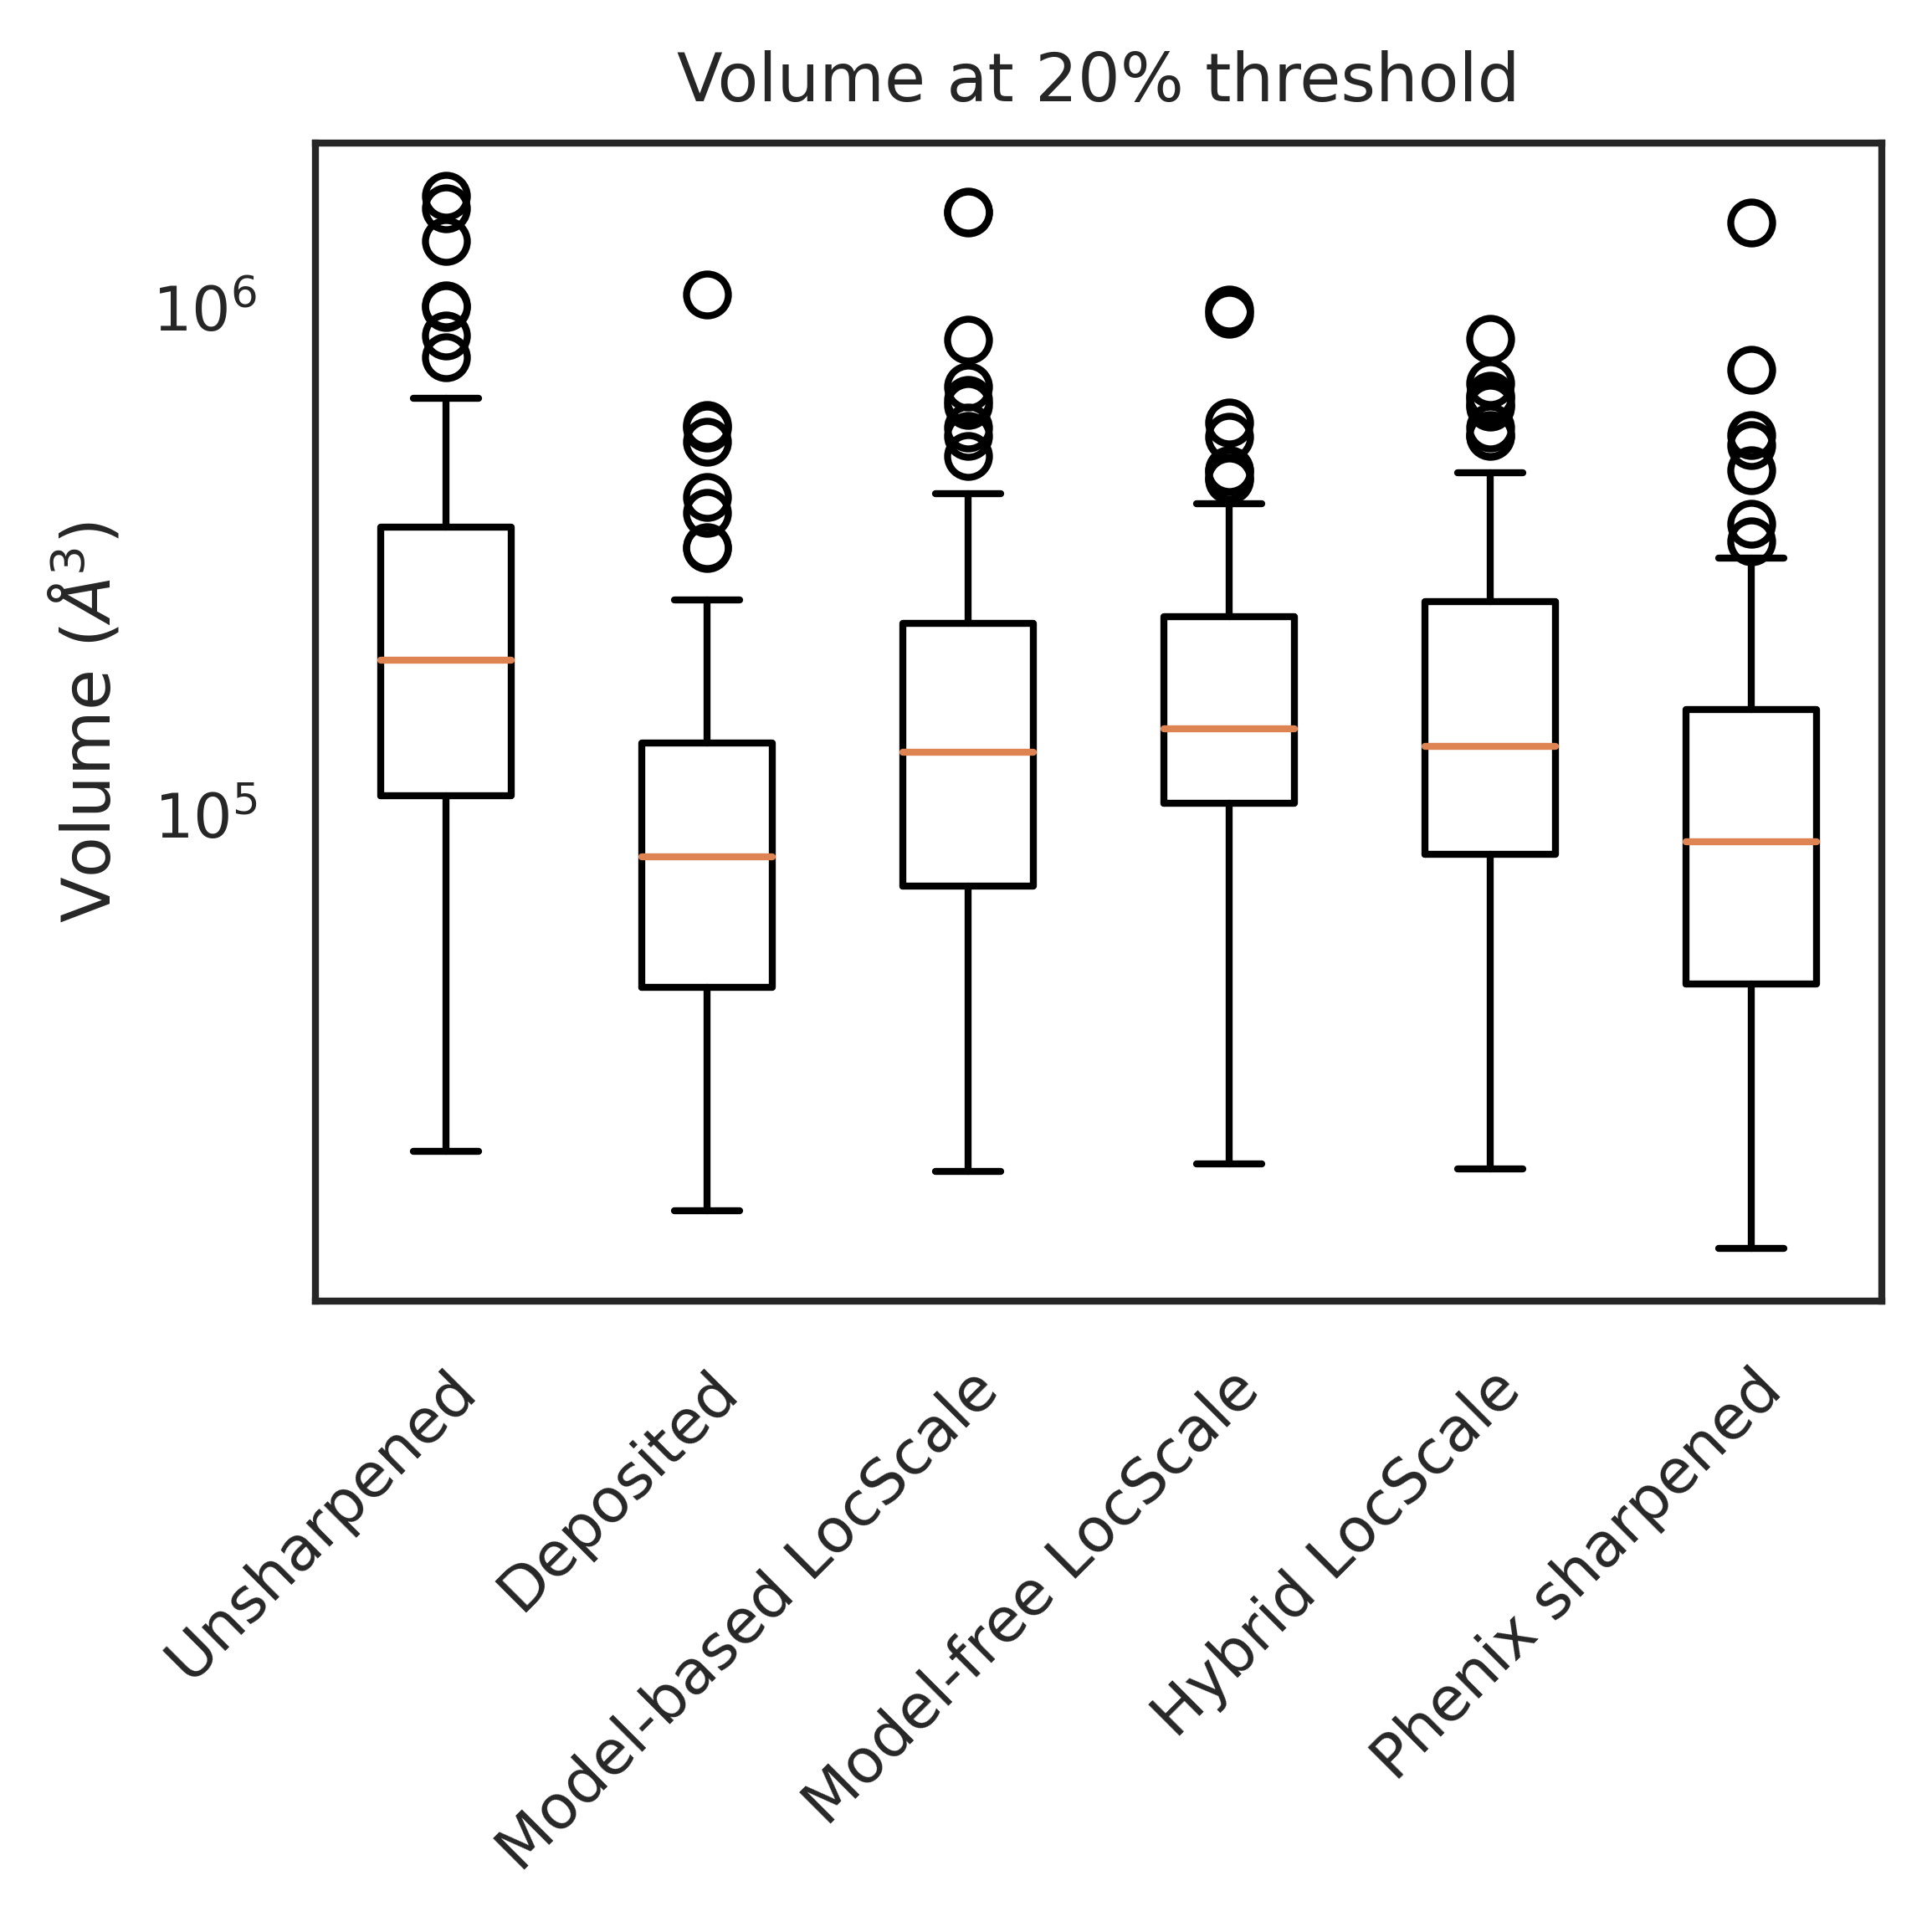

In [29]:

fig_20 = pretty_boxplots1(
    volumes_at_20_list_of_lists,
    labels_list,
    ylabel="Volume ($\AA$$^3$)",
    title='Volume at 20% threshold',
    figsize_cm=(10, 10),
    fontscale=1,
)

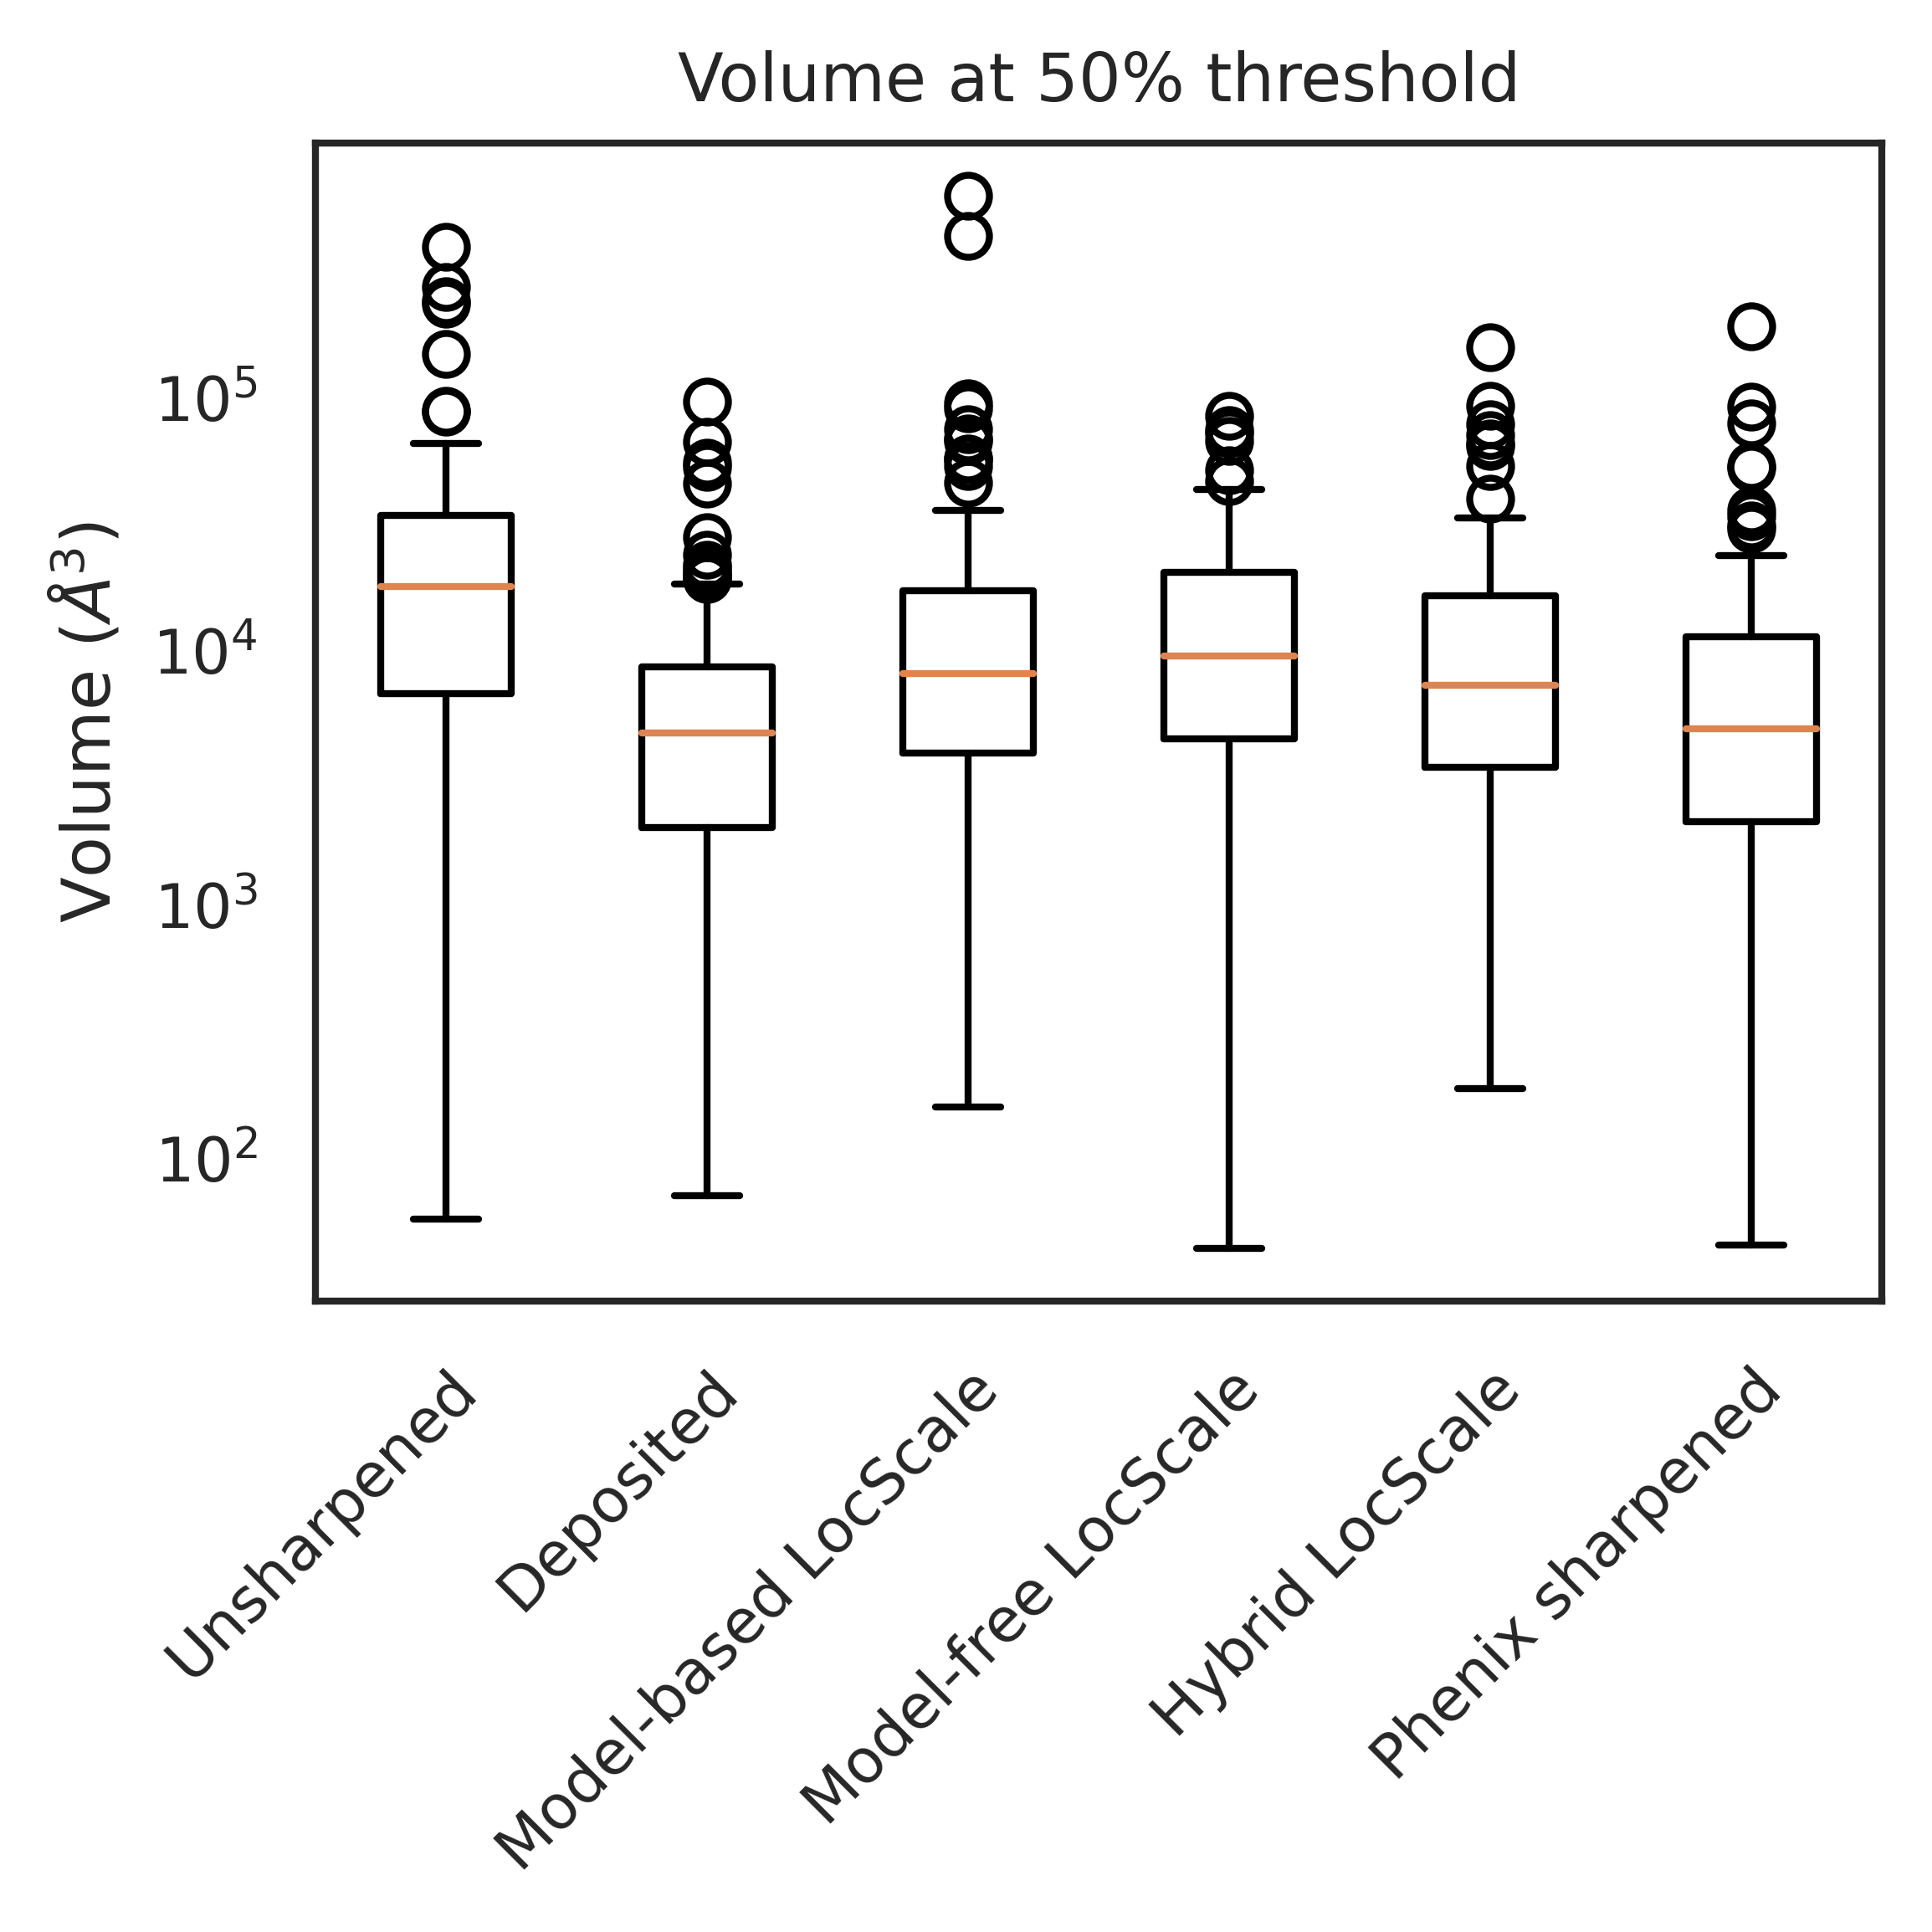

In [30]:

fig_50 = pretty_boxplots1(
    volumes_at_50_list_of_lists,
    labels_list,
    ylabel="Volume ($\AA$$^3$)",
    title='Volume at 50% threshold',
    figsize_cm=(10, 10),
    fontscale=1,
)

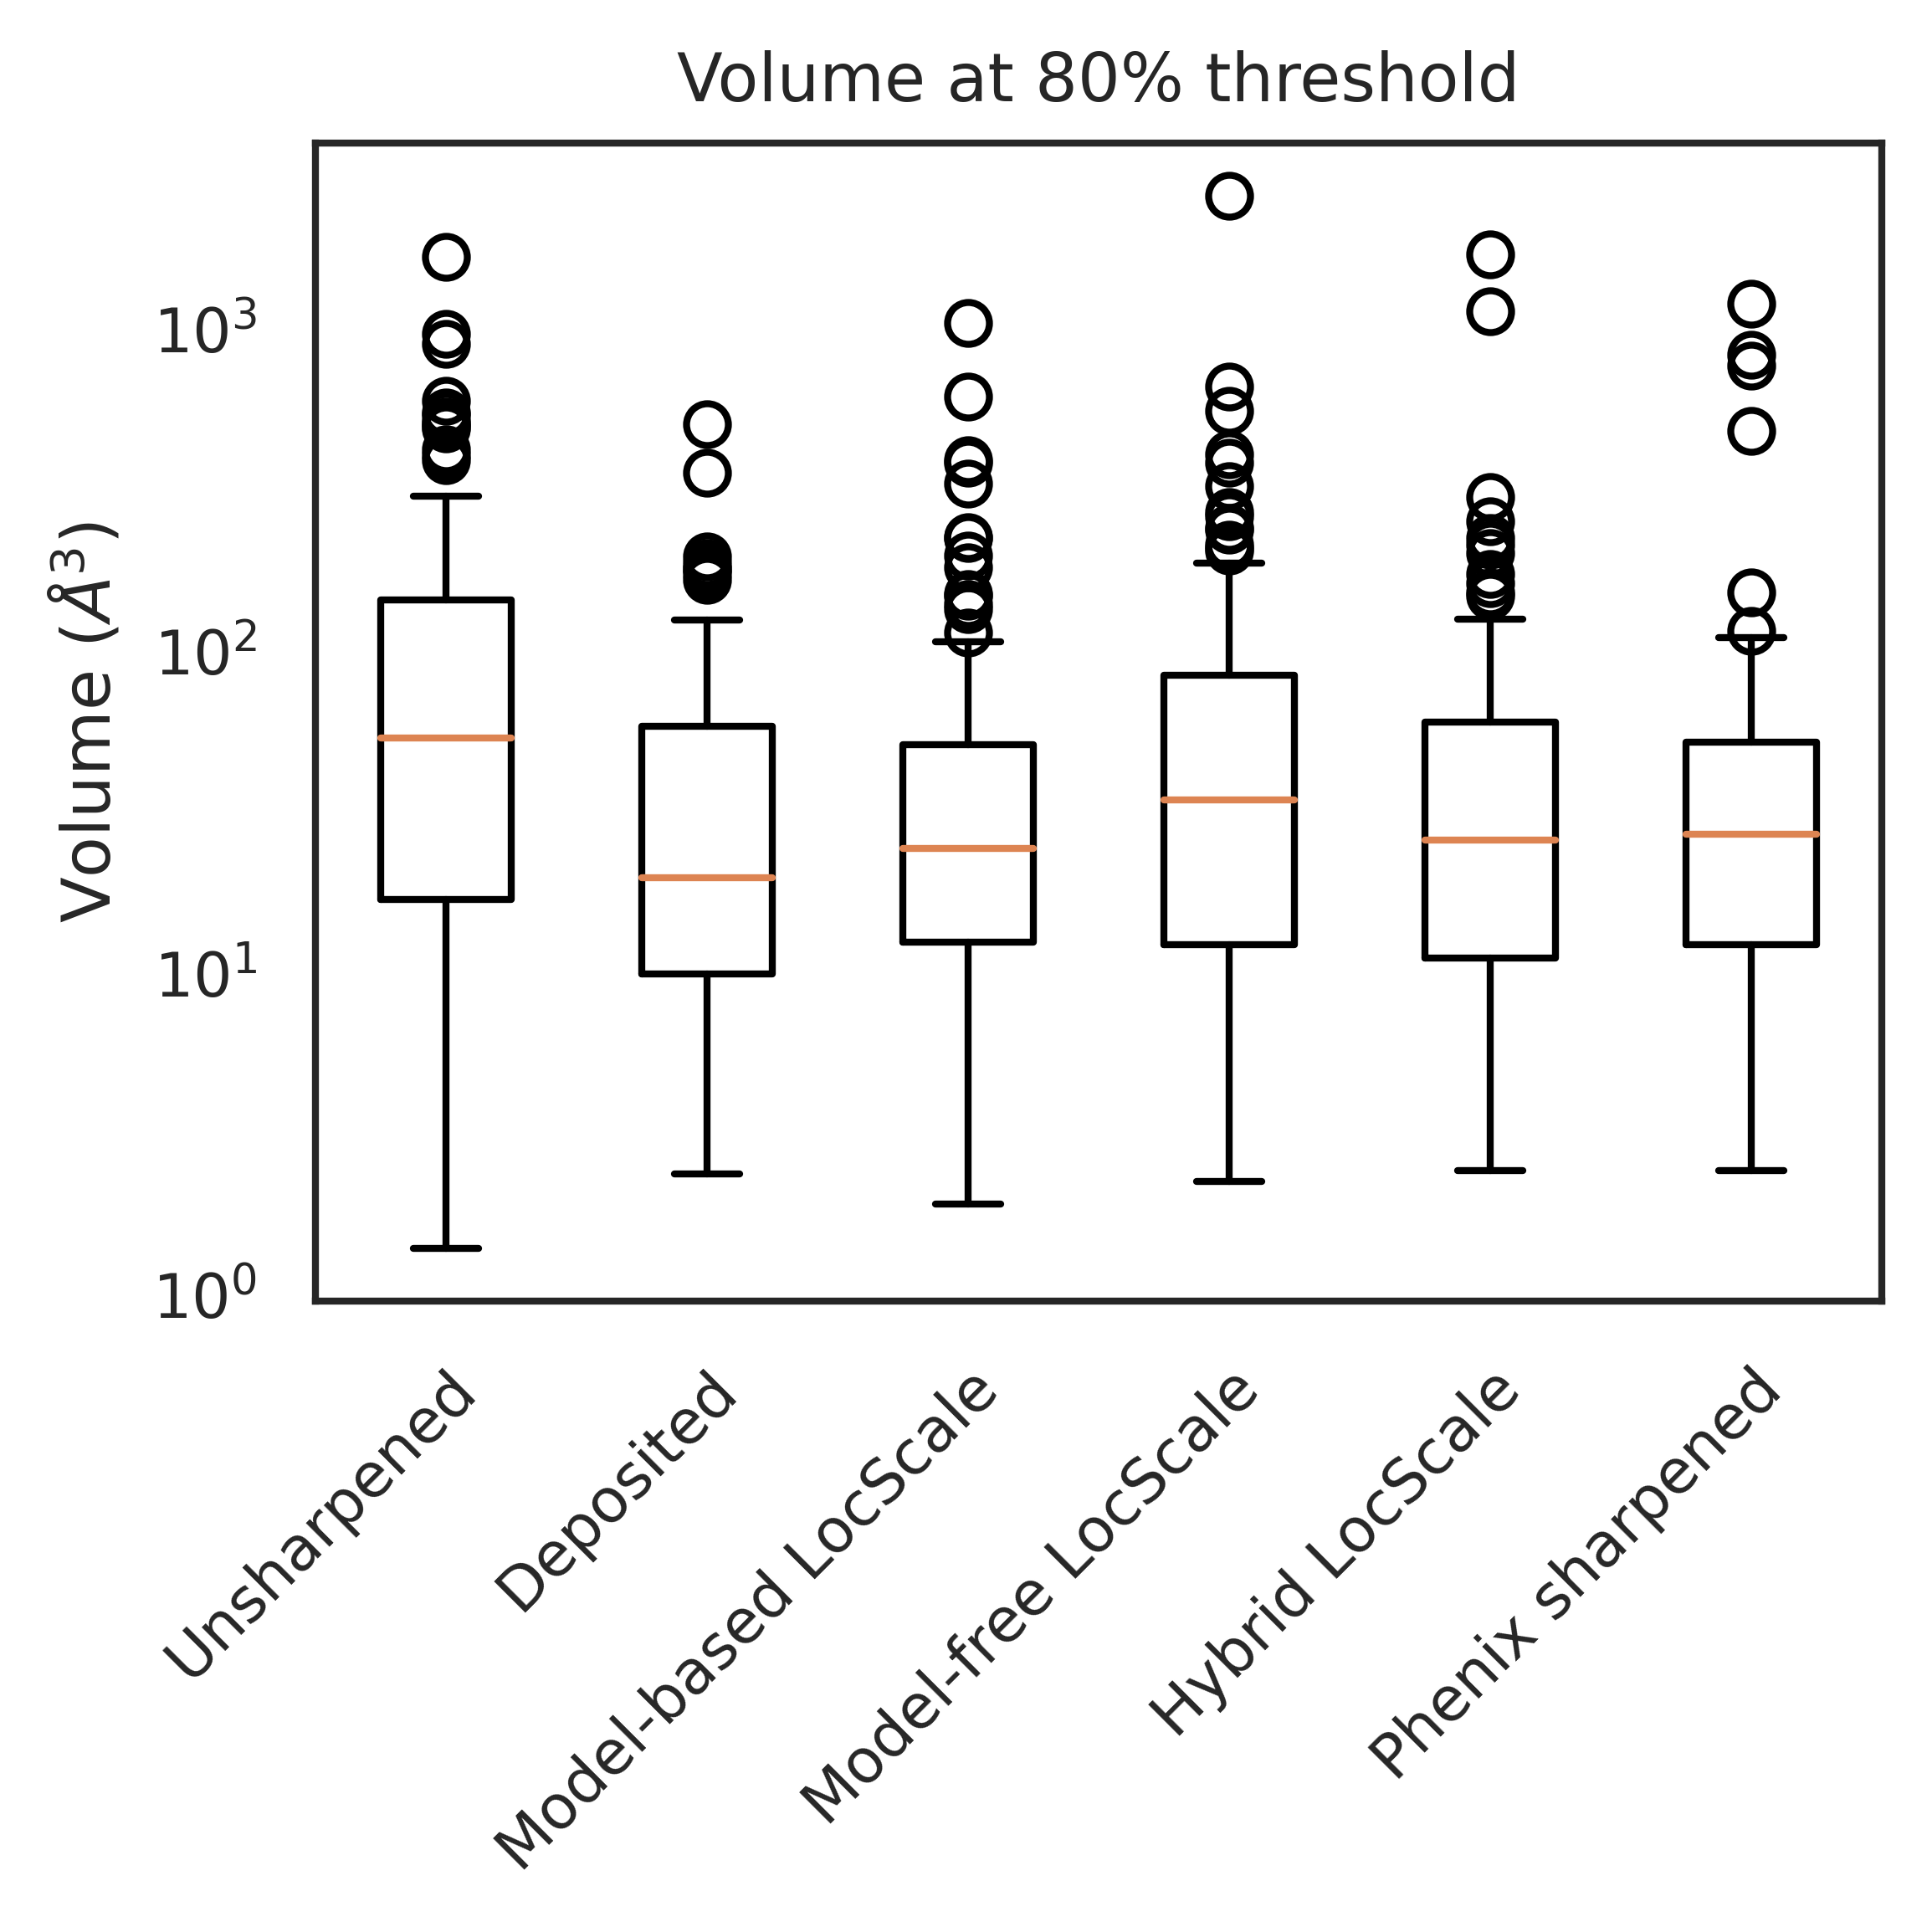

In [31]:

fig_80 = pretty_boxplots1(
    volumes_at_80_list_of_lists,
    labels_list,
    ylabel="Volume ($\AA$$^3$)",
    title='Volume at 80% threshold',
    figsize_cm=(10, 10),
    fontscale=1,
)

In [33]:
fig_20.savefig("volume_at_20.eps", bbox_inches='tight')
fig_50.savefig("volume_at_50.eps", bbox_inches='tight')
fig_80.savefig("volume_at_80.eps", bbox_inches='tight')